# SemesterAssignment

## Table of contents

* [Preprocessing](#chapter1)
    * [Libraries](#section_1_0)
    * [Scalers | Encoders](#section_1_0_1)
    * [1.1 Outlook of data](#section_1_1)
    * [1.2 NaN-values](#section_1_2)
    * [1.3 Grouping](#section_1_3)
    * [1.4 Most common species](#section_1_4)
    * [1.5 Classifying (species)](#section_1_5)
    * [1.6 Grouped data](#section_1_6)
    * [1.7 Scatter plot of groups - so far](#section_1_4)
    * [1.8 Heatmap distribution](#section_1_8)
    * [1.9 Bubblemap distribution](#section_1_9)
    * [2.0 Encoding](#section_2_0)
* [Supervised learning](#chapter2)
    * [1.1 Something](#section_2_1) 
    * [1.2 Decision Trees](#section_2_2)
    * [1.3 Deep learning](#section_2_3)
    * [1.4 Evaluation](#section_2_4) #add
* [Unsupervised learning](#chapter3)
    * [1.1 Preprocessing](#section_3_) #add
    * [1.2 Cluster1](#section_3_) #add 
   

## Libraries <a class="anchor" id="section_1_0"></a>

In [1]:
! pip install feature-engine
! pip install category_encoders

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from numpy import absolute, mean, std
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import plotly.io as pio
from feature_engine.creation import CyclicalFeatures
import category_encoders as ce
from scipy.special import softmax
pio.renderers.default = 'notebook'

## Scalers | Encoders <a class="anchor" id="section_1_0_1"></a>

In [3]:
standard_scaler = StandardScaler() # perhaps use for PCA? If needed...
minmax_scaler = MinMaxScaler()

## Preprocessing <a class="anchor" id="chapter1"></a>

### 1.1 Outlook of data  <a id="section_1_1"></a>

In [4]:
data = pd.read_csv("elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv", sep=";")
data.head()

Melding ID Meldingstidspunkt Meldingsdato Meldingsklokkeslett  \
0     1497177        01.01.2018   01.01.2018               00:00   
1     1497178        01.01.2018   01.01.2018               00:00   
2     1497178        01.01.2018   01.01.2018               00:00   
3     1497178        01.01.2018   01.01.2018               00:00   
4     1497178        01.01.2018   01.01.2018               00:00   

     Starttidspunkt   Startdato Startklokkeslett Startposisjon bredde  \
0        31.12.2017  31.12.2017            00:00               -60,35   
1  30.12.2017 23:21  30.12.2017            23:21               74,885   
2  30.12.2017 23:21  30.12.2017            23:21               74,885   
3  30.12.2017 23:21  30.12.2017            23:21               74,885   
4  30.12.2017 23:21  30.12.2017            23:21               74,885   

  Startposisjon lengde  Hovedområde start (kode)  ...        Art - FDIR  \
0              -46,133                       NaN  ...  Antarktisk krill   
1               16,048                      20.0  ...              Hyse   
2               16,048                      20.0  ...             Torsk   
3               16,048                      20.0  ...         Blåkveite   
4               16,048                      20.0  ...               Sei   

   Art - gruppe (kode)      Art - gruppe  Rundvekt Lengdegruppe (kode)  \
0                506.0  Antarktisk krill  706714.0                 5.0   
1                202.0              Hyse    9594.0                 5.0   
2                201.0             Torsk    8510.0                 5.0   
3                301.0         Blåkveite     196.0                 5.0   
4                203.0               Sei     134.0                 5.0   

   Lengdegruppe  Bruttotonnasje 1969  Bruttotonnasje annen Bredde Fartøylengde  
0  28 m og over               9432.0                   NaN  19,87       133,88  
1  28 m og over               1476.0                   NaN   12,6         56,8  
2  28 m og over               1476.0                   NaN   12,6         56,8  
3  28 m og over               1476.0                   NaN   12,6         56,8  
4  28 m og over               1476.0                   NaN   12,6         56,8  

[5 rows x 45 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  object 
 8   Startposisjon lengde      305434 non-null  object 
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

In [6]:
data.describe()

Melding ID  Hovedområde start (kode)  Lokasjon start (kode)  \
count  3.054340e+05             303433.000000          303433.000000   
mean   1.658783e+06                 14.463737              19.074712   
std    9.130738e+04                 13.001244              18.469340   
min    1.497177e+06                  0.000000               0.000000   
25%    1.567228e+06                  5.000000               7.000000   
50%    1.674230e+06                  8.000000              12.000000   
75%    1.735590e+06                 20.000000              24.000000   
max    1.800291e+06                 81.000000              87.000000   

       Havdybde start       Varighet       Fangstår  Hovedområde stopp (kode)  \
count   305434.000000  305434.000000  305434.000000             303472.000000   
mean      -228.025292     537.095526    2017.999941                 14.430415   
std        226.062493    2201.624688       0.007677                 12.973150   
min      -5388.000000       0.000000    2017.000000                  0.000000   
25%       -273.000000     123.000000    2018.000000                  5.000000   
50%       -196.000000     296.000000    2018.000000                  8.000000   
75%       -128.000000     494.000000    2018.000000                 20.000000   
max       1220.000000  125534.000000    2018.000000                 81.000000   

       Lokasjon stopp (kode)  Havdybde stopp  Trekkavstand  \
count          303472.000000   305434.000000  3.054100e+05   
mean               18.883353     -229.084850  1.566397e+04   
std                18.361244      224.277365  9.033085e+04   
min                 0.000000    -5388.000000  0.000000e+00   
25%                 7.000000     -274.000000  2.533000e+03   
50%                12.000000     -198.000000  7.598000e+03   
75%                24.000000     -127.000000  2.259900e+04   
max                87.000000     1616.000000  1.588863e+07   

       Redskap FDIR (kode)  Hovedart - FDIR (kode)  Art - FDIR (kode)  \
count        305246.000000           300456.000000      300452.000000   
mean             46.489746             1326.729934        1414.625914   
std              13.534202              614.506560         633.188386   
min              11.000000              412.000000         211.000000   
25%              32.000000             1022.000000        1022.000000   
50%              51.000000             1032.000000        1032.000000   
75%              55.000000             1038.000000        2202.000000   
max              80.000000             6619.000000        6619.000000   

       Art - gruppe (kode)      Rundvekt  Lengdegruppe (kode)  \
count        300452.000000  3.004560e+05        304750.000000   
mean            259.746585  7.438208e+03             4.575032   
std             320.124913  4.281086e+04             0.692769   
min             101.000000  0.000000e+00             3.000000   
25%             201.000000  6.400000e+01             4.000000   
50%             203.000000  3.000000e+02             5.000000   
75%             302.000000  2.236000e+03             5.000000   
max            9903.000000  1.100000e+06             5.000000   

       Bruttotonnasje 1969  Bruttotonnasje annen  
count        234005.000000          74774.000000  
mean           1408.386975            186.172573  
std            1148.384145            165.761157  
min             104.000000             21.000000  
25%             496.000000             87.000000  
50%            1184.000000            149.000000  
75%            2053.000000            236.000000  
max            9432.000000           1147.000000

In [7]:
data.iloc[100]

Melding ID                           1497342
Meldingstidspunkt           01.01.2018 23:30
Meldingsdato                      01.01.2018
Meldingsklokkeslett                    23:30
Starttidspunkt              01.01.2018 07:58
Startdato                         01.01.2018
Startklokkeslett                       07:58
Startposisjon bredde                  71,262
Startposisjon lengde                  25,188
Hovedområde start (kode)                 4.0
Hovedområde start              Vest-Finnmark
Lokasjon start (kode)                   26.0
Havdybde start                          -289
Stopptidspunkt              01.01.2018 14:04
Stoppdato                         01.01.2018
Stoppklokkeslett                       14:04
Varighet                                 366
Fangstår                                2018
Stopposisjon bredde                   71,317
Stopposisjon lengde                   25,225
Hovedområde stopp (kode)                 4.0
Hovedområde stopp              Vest-Finnmark
Lokasjon s

In [8]:
#Converting so that every "," goes to "."
coloumns_to_convert = ["Startposisjon bredde", "Startposisjon lengde", "Stopposisjon bredde", "Stopposisjon lengde", "Bredde", "Fartøylengde"]
data[coloumns_to_convert] = data[coloumns_to_convert].replace({',': '.'}, regex=True)

In [9]:
data.iloc[100]

Melding ID                           1497342
Meldingstidspunkt           01.01.2018 23:30
Meldingsdato                      01.01.2018
Meldingsklokkeslett                    23:30
Starttidspunkt              01.01.2018 07:58
Startdato                         01.01.2018
Startklokkeslett                       07:58
Startposisjon bredde                  71.262
Startposisjon lengde                  25.188
Hovedområde start (kode)                 4.0
Hovedområde start              Vest-Finnmark
Lokasjon start (kode)                   26.0
Havdybde start                          -289
Stopptidspunkt              01.01.2018 14:04
Stoppdato                         01.01.2018
Stoppklokkeslett                       14:04
Varighet                                 366
Fangstår                                2018
Stopposisjon bredde                   71.317
Stopposisjon lengde                   25.225
Hovedområde stopp (kode)                 4.0
Hovedområde stopp              Vest-Finnmark
Lokasjon s

In [10]:
# And we want to convert to floats
data[coloumns_to_convert] = data[coloumns_to_convert].astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  float64
 8   Startposisjon lengde      305434 non-null  float64
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

We see now that out "Startposisjon bredde" and more, are now floats and not objects anymore, this will be easier to work with later

###  1.2 NaN-values <a id="section_1_2"></a>

We want to replace some values that are not of significant for us, this by some createria:

In [12]:
data.isnull().sum()

Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

In [13]:
columns_to_check = ['Rundvekt', 'Art FAO', 'Bredde', 'Art - FDIR']

# if any of these values have NaN-values we want to remove them, since we need them for our prediciton later
data.dropna(subset=columns_to_check, how='any', inplace=True)

In [14]:
data.isnull().sum()

Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      1786
Hovedområde start             3760
Lokasjon start (kode)         1786
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1760
Hovedområde stopp             3760
Lokasjon stopp (kode)         1760
Havdybde stopp                   0
Trekkavstand                    19
Redskap FAO (kode)               0
Redskap FAO                    187
Redskap FDIR (kode)            187
Redskap FDIR        

Now that all the Art (species) values have no null values, we can look at the smaller specifics:

In [15]:
columns_to_check_location = ['Hovedområde start', 'Hovedområde stopp', 'Redskap FAO', 'Redskap FDIR']
data.dropna(subset=columns_to_check_location, how='any', inplace=True)
# Again dropping rows that have NaN values, since we need some of these features for our prediction later.

In [16]:
data.isnull().sum()

Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)         0
Hovedområde start                0
Lokasjon start (kode)            0
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)       183
Hovedområde stopp                0
Lokasjon stopp (kode)          183
Havdybde stopp                   0
Trekkavstand                    19
Redskap FAO (kode)               0
Redskap FAO                      0
Redskap FDIR (kode)              0
Redskap FDIR        

We know that we will remove the columns that have "(kode)" in them, since they dont help us with any significance, but we will do this later.

We will also drop the "Bruttotonnasje 1969" and "annen" since, they have so many missing values, and since we also dont need them for later, we will just remove them.

What do we then need?
    Hovedart / art -> fishes 
    *Punkter (start / slutt) -> coordinates
    *Bredde / Fartøylengde -> size of vessel (width and length)
    *Rundvekt -> Weight with fish, should be scaled to show the most fishes caught instead of specifics!

We see the most common species out there, the ones that have been "counted" up the most, meaning have dealt with them the most!

In [17]:
# maybe needed for tools as well? ???

### 1.3 Grouping  <a id="section_1_3"></a>

We are just going to group them after their Message ID, since one trip can have (and in most cases has) multiple and the same Message ID, we can group them so that each trip will (hopefully) only be one row, but we will make sure of this later (*see "classifying species

In [18]:
grouped_data = data.groupby('Melding ID')

In [19]:
type(grouped_data)

pandas.core.groupby.generic.DataFrameGroupBy

In [20]:
grouped_data.groups

{1497178: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 1497229: [19, 20, 21], 1497249: [22, 23, 24, 25], 1497288: [26, 27, 28, 29, 30, 31], 1497306: [32, 33, 34, 35, 36], 1497310: [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], 1497311: [53, 54, 55], 1497312: [56], 1497314: [57, 58, 59, 60], 1497321: [61, 62], 1497323: [63, 64, 65, 67, 68, 69, 70, 71], 1497326: [72, 73, 74, 75, 76, 77], 1497330: [78, 79, 80, 81, 82, 83, 84], 1497332: [85, 86, 87, 88, 89], 1497341: [90, 91, 92, 93], 1497342: [94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106], 1497344: [107, 108], 1497350: [111, 112], 1497351: [113, 114], 1497352: [115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126], 1497353: [127, 128, 129], 1497354: [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140], 1497358: [141, 142], 1497362: [144, 145, 146, 147], 1497364: [148, 149, 150, 151, 152, 153], 1497368: [154, 155, 156, 157, 158, 159, 160], 1497377: [162, 163], 1497383: [164, 165,

In [21]:
species_counts = data['Art - FDIR'].value_counts().reset_index()
species_counts.columns = ['Species', 'Total_Count']
sorted_species_counts = species_counts.sort_values(by='Total_Count', ascending=False)

(*See above*) We are doing this to keep track of the most common species, which we want to visualize (*see under*)

### 1.4 Most common species <a id="section_1_4"></a>

We want to only predict some species, the most common ones, but the most common here, we define as the ones that have been seen the most in the groups themselves, so `counted up the most`, not necessary the most caught in terms of weight

In [22]:
most_common_range = 10

In [23]:
sorted_species_counts

Species  Total_Count
0                  Torsk        56080
1                    Sei        42301
2                   Hyse        38793
3                  Lange        17260
4           Uer (vanlig)        14121
..                   ...          ...
113          Skjeggtorsk            1
114              Sagtang            1
115        Annen makrell            1
116              Blåhval            1
117  Bukstripet pelamide            1

[118 rows x 2 columns]

In [24]:
most_common_species = sorted_species_counts[:most_common_range]
other_most_common_species = sorted_species_counts[most_common_range:]

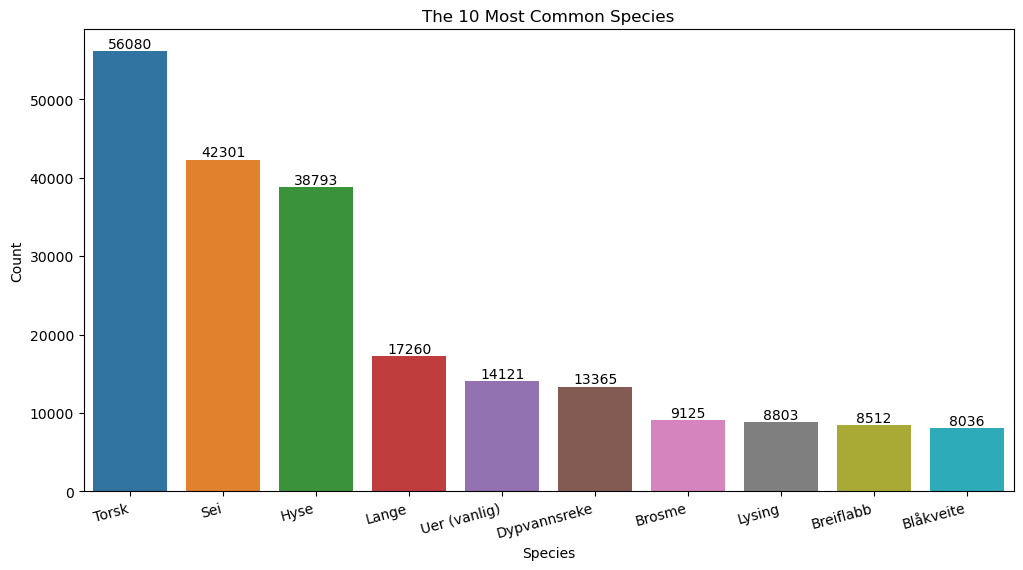

In [25]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Species', y='Total_Count', data=most_common_species)
ax.bar_label(ax.containers[0], fontsize=10); # their counts.
plt.xlabel('Species')
plt.ylabel('Count')
plt.title(f'The {most_common_range} Most Common Species')
plt.xticks(rotation=15, ha='right') 
plt.show()

In [26]:
specific_group = grouped_data.get_group(1497178)
group_key = 1497178

In [27]:
specific_group

Melding ID Meldingstidspunkt Meldingsdato Meldingsklokkeslett  \
1      1497178        01.01.2018   01.01.2018               00:00   
2      1497178        01.01.2018   01.01.2018               00:00   
3      1497178        01.01.2018   01.01.2018               00:00   
4      1497178        01.01.2018   01.01.2018               00:00   
5      1497178        01.01.2018   01.01.2018               00:00   
6      1497178        01.01.2018   01.01.2018               00:00   
7      1497178        01.01.2018   01.01.2018               00:00   
8      1497178        01.01.2018   01.01.2018               00:00   
9      1497178        01.01.2018   01.01.2018               00:00   
10     1497178        01.01.2018   01.01.2018               00:00   
11     1497178        01.01.2018   01.01.2018               00:00   
12     1497178        01.01.2018   01.01.2018               00:00   
13     1497178        01.01.2018   01.01.2018               00:00   
14     1497178        01.01.2018   01.01.2018               00:00   
15     1497178        01.01.2018   01.01.2018               00:00   
16     1497178        01.01.2018   01.01.2018               00:00   
17     1497178        01.01.2018   01.01.2018               00:00   
18     1497178        01.01.2018   01.01.2018               00:00   

      Starttidspunkt   Startdato Startklokkeslett  Startposisjon bredde  \
1   30.12.2017 23:21  30.12.2017            23:21                74.885   
2   30.12.2017 23:21  30.12.2017            23:21                74.885   
3   30.12.2017 23:21  30.12.2017            23:21                74.885   
4   30.12.2017 23:21  30.12.2017            23:21                74.885   
5   31.12.2017 05:48  31.12.2017            05:48                74.910   
6   31.12.2017 05:48  31.12.2017            05:48                74.910   
7   31.12.2017 05:48  31.12.2017            05:48                74.910   
8   31.12.2017 05:48  31.12.2017            05:48                74.910   
9   31.12.2017 05:48  31.12.2017            05:48                74.910   
10  31.12.2017 05:48  31.12.2017            05:48                74.910   
11  31.12.2017 11:34  31.12.2017            11:34                74.883   
12  31.12.2017 11:34  31.12.2017            11:34                74.883   
13  31.12.2017 11:34  31.12.2017            11:34                74.883   
14  31.12.2017 11:34  31.12.2017            11:34                74.883   
15  31.12.2017 11:34  31.12.2017            11:34                74.883   
16  31.12.2017 11:34  31.12.2017            11:34                74.883   
17  31.12.2017 17:44  31.12.2017            17:44                74.931   
18  31.12.2017 17:44  31.12.2017            17:44                74.931   

    Startposisjon lengde  Hovedområde start (kode)  ...     Art - FDIR  \
1                 16.048                      20.0  ...           Hyse   
2                 16.048                      20.0  ...          Torsk   
3                 16.048                      20.0  ...      Blåkveite   
4                 16.048                      20.0  ...            Sei   
5                 15.868                      20.0  ...           Hyse   
6                 15.868                      20.0  ...          Torsk   
7                 15.868                      20.0  ...      Blåkveite   
8                 15.868                      20.0  ...  Flekksteinbit   
9                 15.868                      20.0  ...            Sei   
10                15.868                      20.0  ...         Kveite   
11                16.056                      20.0  ...           Hyse   
12                16.056                      20.0  ...          Torsk   
13                16.056                      20.0  ...      Blåkveite   
14                16.056                      20.0  ...            Sei   
15                16.056                      20.0  ...      Snabeluer   
16                16.056                      20.0  ...   Uer (vanlig)   
17      

From here, we see that each catch, has the same time, showing off the different species, and that when they have another catch they again have a different time, we want to save these, but as less rows, we will come back to this later.

In [28]:
unique_startdates_counts = []

for name, group in grouped_data:
    unique_dates_count = len(group['Startdato'].unique())
        
    if unique_dates_count < 2:
        # ignore
        break
    elif unique_dates_count >= 2:
        unique_startdates_counts.append((name, unique_dates_count))

unique_startdates_counts

[(1497178, 2)]

We are making sure that there isnt a real big difference in the days inside each group, only one group has 2 different days(which we know are a day where its late, and it goes over to the next day, so this wont make a big difference), now we can group them togehter looking after their time, if the time is different inside the group we can make a new row, meaning that if they have the same time all the species have been caught at the same time, if not, then they have been caught at different times:

### 1.5 Classifying (species) <a id="section_1_5"></a>

We are going to classify our species, so that only the most common species have their own `names` and the rest will be `other`

In [29]:
grouped_data["Hovedart FAO"].head()

1         Hyse
2         Hyse
3         Hyse
4         Hyse
5         Hyse
          ... 
305407    Hyse
305408    Hyse
305409    Hyse
305410    Hyse
305411    Hyse
Name: Hovedart FAO, Length: 180693, dtype: object

In [30]:
type(grouped_data["Hovedart FAO"])

pandas.core.groupby.generic.SeriesGroupBy

In [31]:
most_common_species["Species"]

0           Torsk
1             Sei
2            Hyse
3           Lange
4    Uer (vanlig)
5    Dypvannsreke
6          Brosme
7          Lysing
8       Breiflabb
9       Blåkveite
Name: Species, dtype: object

In [32]:
# beware! This code takes a while... (up to a few min.)
most_common_species_set = set(most_common_species["Species"])

def update_species_classification(group):
    group["Art - FDIR"] = group["Art - FDIR"].apply(lambda x: x if x in most_common_species_set else 'Other')
    group["Hovedart FAO"] = group["Hovedart FAO"].apply(lambda x: x if x in most_common_species_set else 'Other')
    # if it's in common species we keep it, else set it to "Other"
    return group

updated_group_data = grouped_data.apply(update_species_classification).reset_index(drop=True)


In [33]:
updated_group_data #We see a few instanses of "other". But we see that we again group our data, but still maintain our dataframe object!

Melding ID Meldingstidspunkt Meldingsdato Meldingsklokkeslett  \
0          1497178        01.01.2018   01.01.2018               00:00   
1          1497178        01.01.2018   01.01.2018               00:00   
2          1497178        01.01.2018   01.01.2018               00:00   
3          1497178        01.01.2018   01.01.2018               00:00   
4          1497178        01.01.2018   01.01.2018               00:00   
...            ...               ...          ...                 ...   
295817     1800291  01.01.2019 09:28   01.01.2019               09:28   
295818     1800291  01.01.2019 09:28   01.01.2019               09:28   
295819     1800291  01.01.2019 09:28   01.01.2019               09:28   
295820     1800291  01.01.2019 09:28   01.01.2019               09:28   
295821     1800291  01.01.2019 09:28   01.01.2019               09:28   

          Starttidspunkt   Startdato Startklokkeslett  Startposisjon bredde  \
0       30.12.2017 23:21  30.12.2017            23:21                74.885   
1       30.12.2017 23:21  30.12.2017            23:21                74.885   
2       30.12.2017 23:21  30.12.2017            23:21                74.885   
3       30.12.2017 23:21  30.12.2017            23:21                74.885   
4       31.12.2017 05:48  31.12.2017            05:48                74.910   
...                  ...         ...              ...                   ...   
295817  31.12.2018 19:41  31.12.2018            19:41                76.906   
295818  31.12.2018 19:41  31.12.2018            19:41                76.906   
295819  31.12.2018 19:41  31.12.2018            19:41                76.906   
295820  31.12.2018 19:41  31.12.2018            19:41                76.906   
295821  31.12.2018 19:41  31.12.2018            19:41                76.906   

        Startposisjon lengde  Hovedområde start (kode)  ...    Art - FDIR  \
0                     16.048                      20.0  ...          Hyse   
1                     16.048                      20.0  ...         Torsk   
2                     16.048                      20.0  ...     Blåkveite   
3                     16.048                      20.0  ...           Sei   
4                     15.868                      20.0  ...          Hyse   
...                      ...                       ...  ...           ...   
295817                12.709                      21.0  ...         Other   
295818                12.709                      21.0  ...  Uer (vanlig)   
295819                12.709                      21.0  ...         Other   
295820                12.709                      21.0  ...         Other   
295821                12.709                      21.0  ...     Blåkveite   

        Art - gruppe (kode)  Art - gruppe Rundvekt Lengdegruppe (kode)  \
0                     202.0          Hyse   9594.0                 5.0   
1                     201.0         Torsk   8510.0                 5.0   
2                     301.0     Blåkveite    196.0                 5.0   
3                     203.0           Sei    134.0                 5.0   
4                     202.0          Hyse   9118.0                 5.0   
...                     ...           ...      ...                 ...   
295817                304.0    Steinbiter    145.0                 5.0   
295818                302.0           Uer    136.0                 5.0   
295819                304.0    Steinbiter    132.0                 5.0   
295820                302.0           Uer    102.0                 5.0   
295821                301.0     Blåkveite     63.0                 5.0   

        Lengdegruppe  Bruttotonnasje 1969  Bruttotonnasje annen  Bredde  \
0       28 m og over               1476.0                   NaN    12.6   
1       28 m og over               1476.0                   NaN    12.6   
2       28 m og over               1476.0                   NaN    12.6   
3       28 m og over               1476.0                   NaN    1

In [34]:
type(updated_group_data)

pandas.core.frame.DataFrame

In [35]:
updated_group_data["Art - FDIR"].head(100).to_string()

'0             Hyse\n1            Torsk\n2        Blåkveite\n3              Sei\n4             Hyse\n5            Torsk\n6        Blåkveite\n7            Other\n8              Sei\n9            Other\n10            Hyse\n11           Torsk\n12       Blåkveite\n13             Sei\n14           Other\n15    Uer (vanlig)\n16           Torsk\n17            Hyse\n18            Hyse\n19           Torsk\n20           Other\n21           Other\n22           Other\n23           Other\n24           Other\n25             Sei\n26           Torsk\n27    Uer (vanlig)\n28           Lange\n29            Hyse\n30           Other\n31           Torsk\n32            Hyse\n33           Other\n34           Other\n35    Uer (vanlig)\n36             Sei\n37       Breiflabb\n38           Torsk\n39           Lange\n40           Other\n41             Sei\n42           Torsk\n43           Lange\n44           Other\n45             Sei\n46           Torsk\n47             Sei\n48           Other\n49           Other\

In [36]:
updated_group_data["Hovedart FAO"].head(100).to_string()

'0       Hyse\n1       Hyse\n2       Hyse\n3       Hyse\n4       Hyse\n5       Hyse\n6       Hyse\n7       Hyse\n8       Hyse\n9       Hyse\n10      Hyse\n11      Hyse\n12      Hyse\n13      Hyse\n14      Hyse\n15      Hyse\n16     Torsk\n17     Torsk\n18      Hyse\n19     Torsk\n20     Torsk\n21     Other\n22     Other\n23     Other\n24     Other\n25       Sei\n26       Sei\n27       Sei\n28       Sei\n29       Sei\n30       Sei\n31     Torsk\n32     Torsk\n33     Torsk\n34     Torsk\n35     Torsk\n36       Sei\n37       Sei\n38       Sei\n39     Lange\n40     Lange\n41     Lange\n42     Lange\n43     Lange\n44     Lange\n45     Lange\n46     Lange\n47       Sei\n48       Sei\n49       Sei\n50       Sei\n51       Sei\n52     Torsk\n53     Torsk\n54     Torsk\n55     Torsk\n56     Torsk\n57     Torsk\n58     Torsk\n59     Torsk\n60       Sei\n61       Sei\n62       Sei\n63       Sei\n64       Sei\n65    Lysing\n66    Lysing\n67    Lysing\n68    Lysing\n69    Lysing\n70      Hyse\n71   

### 1.6 Grouped data <a id="section_1_6"></a>

In [37]:
# Grouping onnce again
Grouped_data = updated_group_data.groupby("Melding ID")

In [38]:
Grouped_data.head()

Melding ID Meldingstidspunkt Meldingsdato Meldingsklokkeslett  \
0          1497178        01.01.2018   01.01.2018               00:00   
1          1497178        01.01.2018   01.01.2018               00:00   
2          1497178        01.01.2018   01.01.2018               00:00   
3          1497178        01.01.2018   01.01.2018               00:00   
4          1497178        01.01.2018   01.01.2018               00:00   
...            ...               ...          ...                 ...   
295795     1800291  01.01.2019 09:28   01.01.2019               09:28   
295796     1800291  01.01.2019 09:28   01.01.2019               09:28   
295797     1800291  01.01.2019 09:28   01.01.2019               09:28   
295798     1800291  01.01.2019 09:28   01.01.2019               09:28   
295799     1800291  01.01.2019 09:28   01.01.2019               09:28   

          Starttidspunkt   Startdato Startklokkeslett  Startposisjon bredde  \
0       30.12.2017 23:21  30.12.2017            23:21                74.885   
1       30.12.2017 23:21  30.12.2017            23:21                74.885   
2       30.12.2017 23:21  30.12.2017            23:21                74.885   
3       30.12.2017 23:21  30.12.2017            23:21                74.885   
4       31.12.2017 05:48  31.12.2017            05:48                74.910   
...                  ...         ...              ...                   ...   
295795  30.12.2018 23:20  30.12.2018            23:20                76.509   
295796  30.12.2018 23:20  30.12.2018            23:20                76.509   
295797  30.12.2018 23:20  30.12.2018            23:20                76.509   
295798  30.12.2018 23:20  30.12.2018            23:20                76.509   
295799  30.12.2018 23:20  30.12.2018            23:20                76.509   

        Startposisjon lengde  Hovedområde start (kode)  ... Art - FDIR  \
0                     16.048                      20.0  ...       Hyse   
1                     16.048                      20.0  ...      Torsk   
2                     16.048                      20.0  ...  Blåkveite   
3                     16.048                      20.0  ...        Sei   
4                     15.868                      20.0  ...       Hyse   
...                      ...                       ...  ...        ...   
295795                14.295                      21.0  ...       Hyse   
295796                14.295                      21.0  ...      Torsk   
295797                14.295                      21.0  ...  Blåkveite   
295798                14.295                      21.0  ...      Other   
295799                14.295                      21.0  ...      Other   

        Art - gruppe (kode)  Art - gruppe Rundvekt Lengdegruppe (kode)  \
0                     202.0          Hyse   9594.0                 5.0   
1                     201.0         Torsk   8510.0                 5.0   
2                     301.0     Blåkveite    196.0                 5.0   
3                     203.0           Sei    134.0                 5.0   
4                     202.0          Hyse   9118.0                 5.0   
...                     ...           ...      ...                 ...   
295795                202.0          Hyse   7277.0                 5.0   
295796                201.0         Torsk   3126.0                 5.0   
295797                301.0     Blåkveite    315.0                 5.0   
295798                304.0    Steinbiter    145.0                 5.0   
295799                304.0    Steinbiter    132.0                 5.0   

        Lengdegruppe  Bruttotonnasje 1969  Bruttotonnasje annen  Bredde  \
0       28 m og over               1476.0                   NaN    12.6   
1       28 m og over               1476.0                   NaN    12.6   
2       28 m og over               1476.0                   NaN    12.6   
3       28 m og over               1476.0                   NaN    12.6   
4       28 m og over         

In [39]:
# And this code also takes a little while.
result_rows = []

species_order = ['Torsk', 'Sei','Hyse','Lange','Uer(vanlig)','Dypvannsreke', 'Other']  # Defined some order of species.
# how they are defined are by see: sub-section 1.5, "Most common species".



for name, group in Grouped_data:
    common_info = {
        'Melding ID': name,
        'latitude': group['Startposisjon bredde'].iloc[0],
        'longitude': group['Startposisjon lengde'].iloc[0],
        'main_location': group['Hovedområde start'].iloc[0],
        'main_species': group['Hovedart FAO'].iloc[0],
        'vessel_ratio(height/width)': group['Fartøylengde'].iloc[0] / group['Bredde'].iloc[0],
        'start_date': group['Startdato'].iloc[0],
        'time_duration' : group['Varighet'].iloc[0],
        'total_weight' : group['Rundvekt'].sum(),
        'times_list': group['Startklokkeslett'].iloc[0],
        #'tools_used': group['Redskap FDIR'].iloc[0], # Maybe we will keep this for our final model.
        'species_weights_list': [group.loc[group['Art - FDIR'] == species, 'Rundvekt'].sum() for species in species_order]
    }

    result_rows.append(common_info)

result_df = pd.DataFrame(result_rows)


In [40]:
result_df

Melding ID  latitude  longitude                  main_location  \
0         1497178    74.885     16.048                       Bjørnøya   
1         1497229    67.828     12.972  Røstbanken til Malangsgrunnen   
2         1497249    74.811     36.665                  Sentralbanken   
3         1497288    69.744     16.516  Røstbanken til Malangsgrunnen   
4         1497306    72.866     29.105                 Nordkappbanken   
...           ...       ...        ...                            ...   
45939     1800268    74.957     16.174                       Bjørnøya   
45940     1800269    70.844     50.071                     Gåsebanken   
45941     1800285    74.892     17.255                       Bjørnøya   
45942     1800286    70.888     22.321                  Vest-Finnmark   
45943     1800291    76.509     14.295               Vest-Spitsbergen   

      main_species  vessel_ratio(height/width)  start_date  time_duration  \
0             Hyse                    4.507937  30.12.2017            295   
1             Hyse                    3.774704  01.01.2018             63   
2            Other                    4.459821  01.01.2018            101   
3              Sei                    3.054444  01.01.2018            881   
4            Torsk                    4.658000  01.01.2018            900   
...            ...                         ...         ...            ...   
45939        Torsk                    4.014286  30.12.2018            315   
45940         Hyse                    4.271429  31.12.2018           1226   
45941        Torsk                    4.410256  31.12.2018            317   
45942          Sei                    3.789524  31.12.2018            152   
45943         Hyse                    4.547619  30.12.2018            301   

       total_weight times_list  \
0           66154.0      23:21   
1            1854.0      10:01   
2             871.0      01:19   
3            5304.0      05:47   
4           11321.0      07:00   
...             ...        ...   
45939       36879.0      22:50   
45940       25363.0      02:34   
45941       29247.0      00:26   
45942       20262.0      09:50   
45943       45742.0      23:20   

                                  species_weights_list  
0      [27280.0, 269.0, 37902.0, 0.0, 0.0, 0.0, 143.0]  
1              [1800.0, 0.0, 4.0, 0.0, 0.0, 0.0, 50.0]  
2                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 871.0]  
3         [2100.0, 2895.0, 54.0, 95.0, 0.0, 0.0, 16.0]  
4          [8371.0, 0.0, 2257.0, 0.0, 0.0, 0.0, 660.0]  
...                                                ...  
45939  [24090.0, 68.0, 11155.0, 0.0, 0.0, 0.0, 1170.0]  
45940     [10107.0, 0.0, 15201.0, 0.0, 0.0, 0.0, 55.0]  
45941     [20316.0, 0.0, 7303.0, 0.0, 0.0, 0.0, 667.0]  
45942   [4117.0, 15749.0, 258.0, 0.0, 0.0, 0.0, 138.0]  
45943   [16725.0, 32.0, 27144.0, 0.0, 0.0, 0.0, 998.0]  

[45944 rows x 11 columns]

One thing to mention is our `species_order` (above), this order will be maintained troughout our project and we will later explore what we will do with this data. Also see that some of our times, just have a singular item in them, we will keep this in mind for later. (See `Encoding` Section 2.0)

And another thing is our `time` variable, we are taking the first one out of the group, this represents their first time of actually starting the expedition *(the first catch)*.

In [41]:
type(result_df)

pandas.core.frame.DataFrame

In [42]:
result_df["species_weights_list"]

0        [27280.0, 269.0, 37902.0, 0.0, 0.0, 0.0, 143.0]
1                [1800.0, 0.0, 4.0, 0.0, 0.0, 0.0, 50.0]
2                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 871.0]
3           [2100.0, 2895.0, 54.0, 95.0, 0.0, 0.0, 16.0]
4            [8371.0, 0.0, 2257.0, 0.0, 0.0, 0.0, 660.0]
                              ...                       
45939    [24090.0, 68.0, 11155.0, 0.0, 0.0, 0.0, 1170.0]
45940       [10107.0, 0.0, 15201.0, 0.0, 0.0, 0.0, 55.0]
45941       [20316.0, 0.0, 7303.0, 0.0, 0.0, 0.0, 667.0]
45942     [4117.0, 15749.0, 258.0, 0.0, 0.0, 0.0, 138.0]
45943     [16725.0, 32.0, 27144.0, 0.0, 0.0, 0.0, 998.0]
Name: species_weights_list, Length: 45944, dtype: object

In [43]:
group_data = result_df.groupby('Melding ID')

In [44]:
group_data.groups

{1497178: [0], 1497229: [1], 1497249: [2], 1497288: [3], 1497306: [4], 1497310: [5], 1497311: [6], 1497312: [7], 1497314: [8], 1497321: [9], 1497323: [10], 1497326: [11], 1497330: [12], 1497332: [13], 1497341: [14], 1497342: [15], 1497344: [16], 1497350: [17], 1497351: [18], 1497352: [19], 1497353: [20], 1497354: [21], 1497358: [22], 1497362: [23], 1497364: [24], 1497368: [25], 1497377: [26], 1497383: [27], 1497384: [28], 1497414: [29], 1497421: [30], 1497422: [31], 1497423: [32], 1497424: [33], 1497426: [34], 1497432: [35], 1497433: [36], 1497435: [37], 1497444: [38], 1497448: [39], 1497475: [40], 1497482: [41], 1497484: [42], 1497489: [43], 1497495: [44], 1497505: [45], 1497514: [46], 1497531: [47], 1497537: [48], 1497550: [49], 1497555: [50], 1497556: [51], 1497559: [52], 1497562: [53], 1497581: [54], 1497589: [55], 1497600: [56], 1497621: [57], 1497628: [58], 1497631: [59], 1497634: [60], 1497659: [61], 1497681: [62], 1497685: [63], 1497686: [64], 1497687: [65], 1497692: [66], 1497

In [45]:
group_data.head()

Melding ID  latitude  longitude                  main_location  \
0         1497178    74.885     16.048                       Bjørnøya   
1         1497229    67.828     12.972  Røstbanken til Malangsgrunnen   
2         1497249    74.811     36.665                  Sentralbanken   
3         1497288    69.744     16.516  Røstbanken til Malangsgrunnen   
4         1497306    72.866     29.105                 Nordkappbanken   
...           ...       ...        ...                            ...   
45939     1800268    74.957     16.174                       Bjørnøya   
45940     1800269    70.844     50.071                     Gåsebanken   
45941     1800285    74.892     17.255                       Bjørnøya   
45942     1800286    70.888     22.321                  Vest-Finnmark   
45943     1800291    76.509     14.295               Vest-Spitsbergen   

      main_species  vessel_ratio(height/width)  start_date  time_duration  \
0             Hyse                    4.507937  30.12.2017            295   
1             Hyse                    3.774704  01.01.2018             63   
2            Other                    4.459821  01.01.2018            101   
3              Sei                    3.054444  01.01.2018            881   
4            Torsk                    4.658000  01.01.2018            900   
...            ...                         ...         ...            ...   
45939        Torsk                    4.014286  30.12.2018            315   
45940         Hyse                    4.271429  31.12.2018           1226   
45941        Torsk                    4.410256  31.12.2018            317   
45942          Sei                    3.789524  31.12.2018            152   
45943         Hyse                    4.547619  30.12.2018            301   

       total_weight times_list  \
0           66154.0      23:21   
1            1854.0      10:01   
2             871.0      01:19   
3            5304.0      05:47   
4           11321.0      07:00   
...             ...        ...   
45939       36879.0      22:50   
45940       25363.0      02:34   
45941       29247.0      00:26   
45942       20262.0      09:50   
45943       45742.0      23:20   

                                  species_weights_list  
0      [27280.0, 269.0, 37902.0, 0.0, 0.0, 0.0, 143.0]  
1              [1800.0, 0.0, 4.0, 0.0, 0.0, 0.0, 50.0]  
2                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 871.0]  
3         [2100.0, 2895.0, 54.0, 95.0, 0.0, 0.0, 16.0]  
4          [8371.0, 0.0, 2257.0, 0.0, 0.0, 0.0, 660.0]  
...                                                ...  
45939  [24090.0, 68.0, 11155.0, 0.0, 0.0, 0.0, 1170.0]  
45940     [10107.0, 0.0, 15201.0, 0.0, 0.0, 0.0, 55.0]  
45941     [20316.0, 0.0, 7303.0, 0.0, 0.0, 0.0, 667.0]  
45942   [4117.0, 15749.0, 258.0, 0.0, 0.0, 0.0, 138.0]  
45943   [16725.0, 32.0, 27144.0, 0.0, 0.0, 0.0, 998.0]  

[45944 rows x 11 columns]

Much better, now actually showing each group with the same "Melding ID" as one group, containing multiple catches and their corresponding species and weights, and so on...

### 1.7 Scatter plot of groups - so far <a id="section_1_7"></a>

It would be beneficial to show some of the information, like the `Vessel Ratio` comparied to the `total weight` for each group, to be represented.

In [46]:
total_catch_by_group = group_data["total_weight"].sum()
vessel_size_by_group = group_data["vessel_ratio(height/width)"].first()

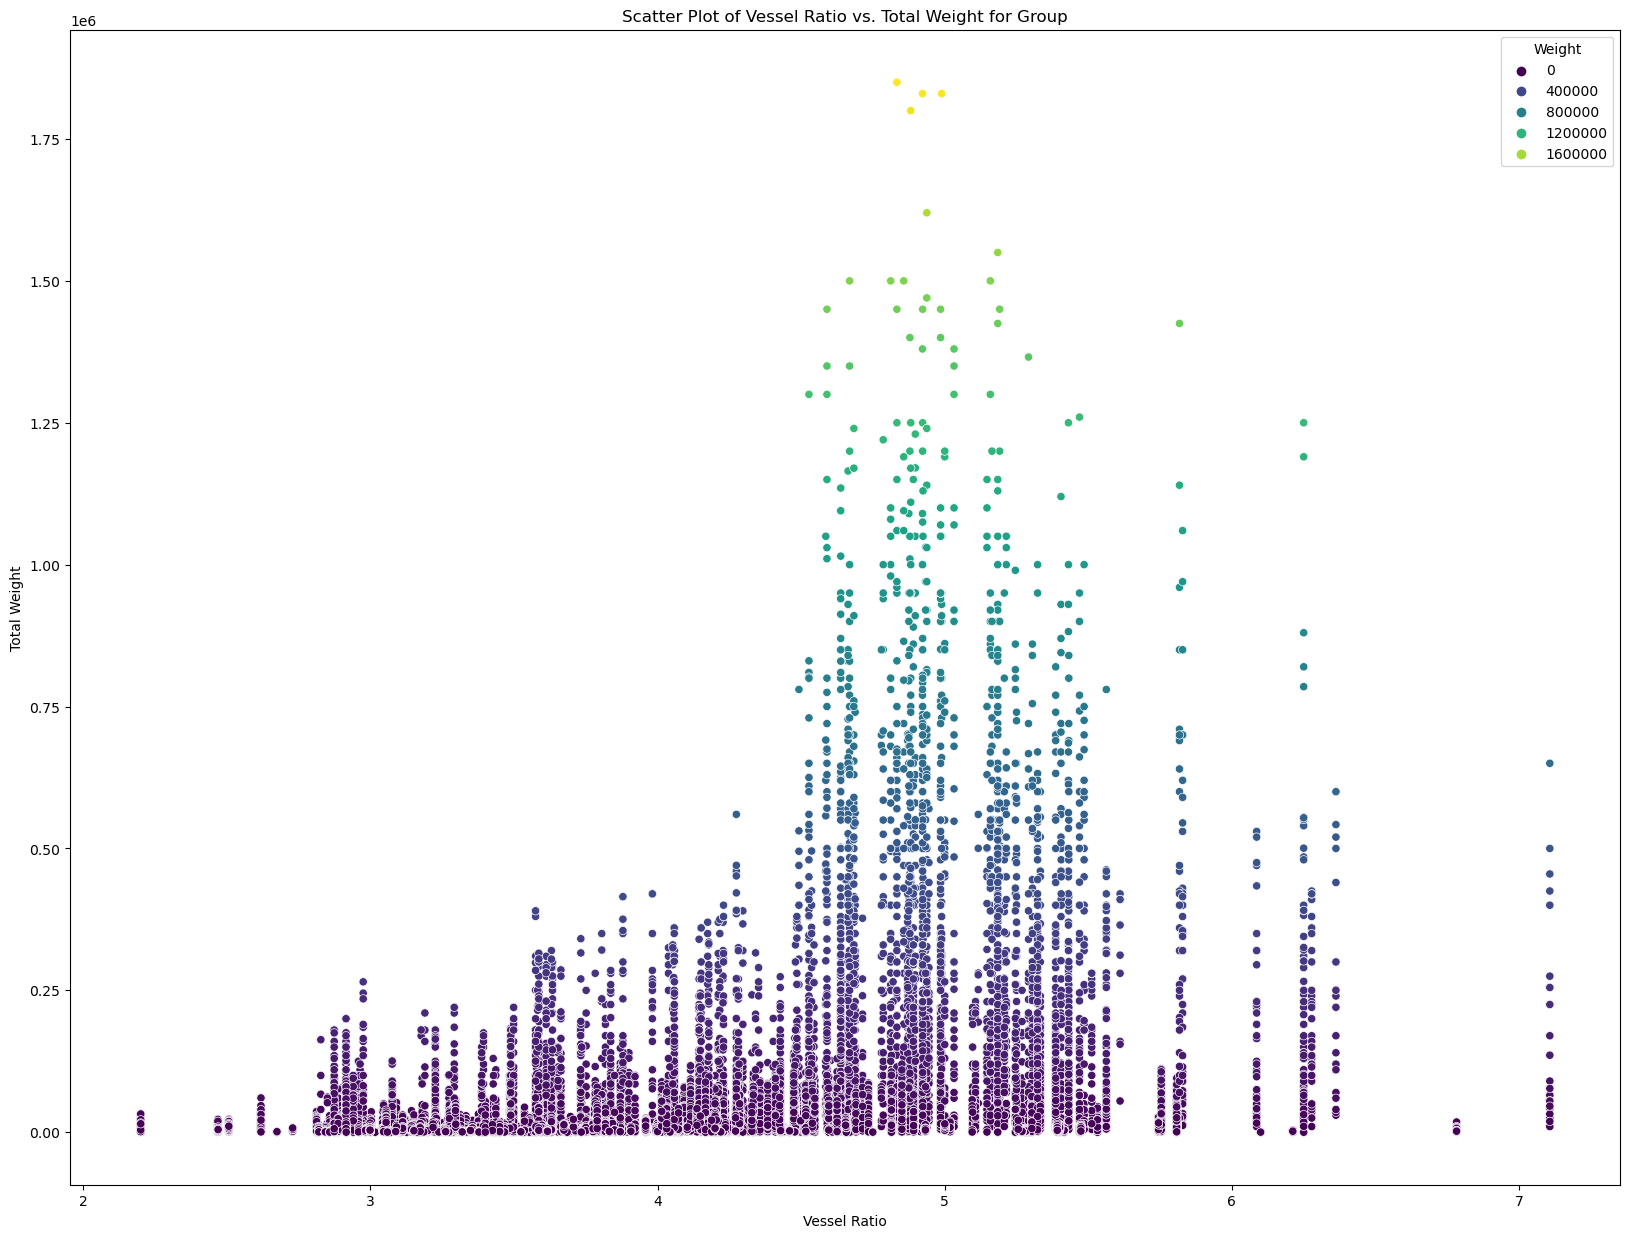

In [47]:
scatter_data = pd.DataFrame({ # only for representation, for now.
    'Melding ID': total_catch_by_group.index,
    'Total Weight': total_catch_by_group.values,
    'Vessel Ratio': vessel_size_by_group.values
})

plt.figure(figsize=(20, 15))
sns.scatterplot(x='Vessel Ratio', y='Total Weight', hue='Total Weight', data=scatter_data, palette='viridis')
plt.title('Scatter Plot of Vessel Ratio vs. Total Weight for Group')
plt.xlabel('Vessel Ratio')
plt.ylabel('Total Weight')
plt.legend(title='Weight')
plt.show()

This isnt really giving us the best representation out there, but it is a good start! Since most of these groups will be a lot smaller than some of the really bigger ones, its hard to represent them all in one plot together, so this will be our starting point.

In [48]:
scatter_data.head()

Melding ID  Total Weight  Vessel Ratio
0     1497178       66154.0      4.507937
1     1497229        1854.0      3.774704
2     1497249         871.0      4.459821
3     1497288        5304.0      3.054444
4     1497306       11321.0      4.658000

### 1.8 Heatmap distribution  <a id="section_1_8"></a>

We want a simple heatmap distribution, we are going to do this with Plotly's map, this will give us a map that will be detailed with some hover information and give us good instight, where most of our data lies, this is all from: https://plotly.com/python/maps/

In [49]:
fig = px.density_mapbox(
    result_df,  # we could just merge or sometjing to get our total values, since we alrready have them!
    lat='latitude',  
    lon='longitude', 
    z='total_weight',
    hover_data=['main_species','Melding ID'],
    radius=10,
    zoom=3,
    height=300
)



fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)
fig.show()

### 1.9 Bubblemap distribution  <a id="section_1_9"></a>

It would also be hepful to get it to a scatter map, like a bubble map and show our data here:

In [50]:
sampled_data = result_df.sample(frac=0.03) 
fig = px.scatter_geo(
    sampled_data, 
    lat='latitude', 
    lon='longitude', 
    color="main_species", 
    hover_name="Melding ID", 
    size="total_weight", 
    projection="natural earth",
    scope="europe"  
)

fig.show()

### Encoding 2.0 <a id="section_2_0"></a>

In [51]:
# encode our date values into circular encoding and generally all other data! Below, do some discussion about how we want to do this and go right ahead.

We want to encode the following data:
-main_location *simple encoding*
-start_time *complex encoding*
-species_weights *medium encoding*
-Etc.

In [52]:

#We want to encode the following data. (how to work with these groups though? We might see later...)
#: main_location - medium encoding
#: main_species - simple encoding (removed, only used for our visualization *see above*)
#: start_time - complex encoding (cirular encoding)
#: total_weights - simple encoding


In [53]:
cyclical = CyclicalFeatures(variables = None)

In [54]:
def transform_from_hour_to_cyclical(df):
    test_dataframe = df.to_frame() # to dataframe
    values_test = test_dataframe["times_list"].values # its values
    reshape_test = values_test.reshape(-1,1) # reshape to 1D format
    hours_list = np.char.split(reshape_test.astype(str), ":").tolist() # Split to ["Hour", "Minute"]
    hours_list = [value[0][:1] for value in hours_list] # keep only ["Hour"]
    df_hours = pd.DataFrame(hours_list, columns=['Hour']) # create new dataframe with "Hour"-col.
    df_hours['Hour'] = pd.to_numeric(df_hours['Hour']) # ensure its numeric.
    return df_hours
    
new_hour_df_test = transform_from_hour_to_cyclical(result_df["times_list"])


new_hour_df_test["Hour"] #we see the hours transformed to their respective times.

In [55]:
test = cyclical.fit_transform(new_hour_df_test[["Hour"]]) #selecting dataframe!
test.head() 

Hour      Hour_sin  Hour_cos
0    23 -2.449294e-16  1.000000
1    10  3.984011e-01 -0.917211
2     1  2.697968e-01  0.962917
3     5  9.790841e-01  0.203456
4     7  9.422609e-01 -0.334880

We can see the correlation by their website (`feature-engine`) and visualizie it as a `circle`. From the following page: https://feature-engine.trainindata.com/en/latest/user_guide/creation/CyclicalFeatures.html#

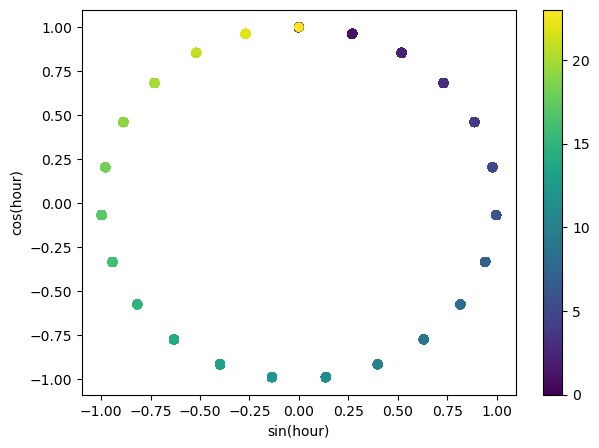

In [56]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(test["Hour_sin"], test["Hour_cos"], c=test["Hour"])
ax.set(
    xlabel="sin(hour)",
    ylabel="cos(hour)",
)
_ = fig.colorbar(sp)

Visualizing the (x,y) cicle coordinates generated by the sine and cosine features.

Now we can actually, place these values in our dataframe, but this will be two features now, instead of one:

In [57]:
cyclical = CyclicalFeatures(variables = None, drop_original=True) # we can drop the orig. featues, no use for us now.
new_hour_df = transform_from_hour_to_cyclical(result_df["times_list"])
test = cyclical.fit_transform(new_hour_df_test[["Hour"]]) #selecting dataframe!
test.head() 

Hour_sin  Hour_cos
0 -2.449294e-16  1.000000
1  3.984011e-01 -0.917211
2  2.697968e-01  0.962917
3  9.790841e-01  0.203456
4  9.422609e-01 -0.334880

In [58]:
result_df.reset_index(drop=True, inplace=True) # avoiding potential issues when concatination is happening...
test.reset_index(drop=True, inplace=True)

result_df = pd.concat([result_df, test[['Hour_sin', 'Hour_cos']]], axis=1) # adding to original dataframe

In [59]:
result_df.drop("times_list", axis=1, inplace=True) # we can remove start_time as we now have a encoded version.

In [60]:
result_df

Melding ID  latitude  longitude                  main_location  \
0         1497178    74.885     16.048                       Bjørnøya   
1         1497229    67.828     12.972  Røstbanken til Malangsgrunnen   
2         1497249    74.811     36.665                  Sentralbanken   
3         1497288    69.744     16.516  Røstbanken til Malangsgrunnen   
4         1497306    72.866     29.105                 Nordkappbanken   
...           ...       ...        ...                            ...   
45939     1800268    74.957     16.174                       Bjørnøya   
45940     1800269    70.844     50.071                     Gåsebanken   
45941     1800285    74.892     17.255                       Bjørnøya   
45942     1800286    70.888     22.321                  Vest-Finnmark   
45943     1800291    76.509     14.295               Vest-Spitsbergen   

      main_species  vessel_ratio(height/width)  start_date  time_duration  \
0             Hyse                    4.507937  30.12.2017            295   
1             Hyse                    3.774704  01.01.2018             63   
2            Other                    4.459821  01.01.2018            101   
3              Sei                    3.054444  01.01.2018            881   
4            Torsk                    4.658000  01.01.2018            900   
...            ...                         ...         ...            ...   
45939        Torsk                    4.014286  30.12.2018            315   
45940         Hyse                    4.271429  31.12.2018           1226   
45941        Torsk                    4.410256  31.12.2018            317   
45942          Sei                    3.789524  31.12.2018            152   
45943         Hyse                    4.547619  30.12.2018            301   

       total_weight                             species_weights_list  \
0           66154.0  [27280.0, 269.0, 37902.0, 0.0, 0.0, 0.0, 143.0]   
1            1854.0          [1800.0, 0.0, 4.0, 0.0, 0.0, 0.0, 50.0]   
2             871.0            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 871.0]   
3            5304.0     [2100.0, 2895.0, 54.0, 95.0, 0.0, 0.0, 16.0]   
4           11321.0      [8371.0, 0.0, 2257.0, 0.0, 0.0, 0.0, 660.0]   
...             ...                                              ...   
45939       36879.0  [24090.0, 68.0, 11155.0, 0.0, 0.0, 0.0, 1170.0]   
45940       25363.0     [10107.0, 0.0, 15201.0, 0.0, 0.0, 0.0, 55.0]   
45941       29247.0     [20316.0, 0.0, 7303.0, 0.0, 0.0, 0.0, 667.0]   
45942       20262.0   [4117.0, 15749.0, 258.0, 0.0, 0.0, 0.0, 138.0]   
45943       45742.0   [16725.0, 32.0, 27144.0, 0.0, 0.0, 0.0, 998.0]   

           Hour_sin  Hour_cos  
0     -2.449294e-16  1.000000  
1      3.984011e-01 -0.917211  
2      2.697968e-01  0.962917  
3      9.790841e-01  0.203456  
4      9.422609e-01 -0.334880  
...             ...       ...  
45939 -2.697968e-01  0.962917  
45940  5.195840e-01  0.854419  
45941  0.000000e+00  1.000000  
45942  6.310879e-01 -0.775711  
45943 -2.449294e-16  1.000000  

[45944 rows x 12 columns]

Now we have encoded our hour (time) by cyclical encoding, we want to do the same for our dates, but have to take in cosideration:
- We dont want to take in count `which year` we are in, we want to just have an idea of which month we are in, not year, as this can fluxuate just by missing data or other things (like a good year, or something similar).We will come back to this, trying to explain why we didn't consider our "year" here.

In [61]:
result_df[["start_date"]]

start_date
0      30.12.2017
1      01.01.2018
2      01.01.2018
3      01.01.2018
4      01.01.2018
...           ...
45939  30.12.2018
45940  31.12.2018
45941  31.12.2018
45942  31.12.2018
45943  30.12.2018

[45944 rows x 1 columns]

In [62]:
def transform_from_date_to_cyclical(df):
    test_dataframe = df.to_frame() # to dataframe
    values_test = test_dataframe["start_date"].values # its values
    reshape_test = values_test.reshape(-1,1) # reshape to 1D format
    date_list = np.char.split(reshape_test.astype(str), ".").tolist() # Split to ["Day", "Month", "Year"]
    date_list = [value[0][:2] for value in date_list] # keep only ["Day", "Month"] NOT ["Year"]
    df_dates = pd.DataFrame(date_list, columns=['Day', 'Month']) # create new dataframe with "Day" / "Month"-col.
    df_dates['Day'] = pd.to_numeric(df_dates['Day']) # ensure its numeric.
    df_dates['Month'] = pd.to_numeric(df_dates['Month']) # ensure its numeric.
    return df_dates


In [63]:
new_date_df = transform_from_date_to_cyclical(result_df["start_date"])
new_date_df

Day  Month
0       30     12
1        1      1
2        1      1
3        1      1
4        1      1
...    ...    ...
45939   30     12
45940   31     12
45941   31     12
45942   31     12
45943   30     12

[45944 rows x 2 columns]

In [64]:
date_cyclical = cyclical.fit_transform(new_date_df[["Day", "Month"]]) #selecting dataframe!

In [65]:
date_cyclical.head() 

Day_sin  Day_cos     Month_sin  Month_cos
0 -0.201299  0.97953 -2.449294e-16   1.000000
1  0.201299  0.97953  5.000000e-01   0.866025
2  0.201299  0.97953  5.000000e-01   0.866025
3  0.201299  0.97953  5.000000e-01   0.866025
4  0.201299  0.97953  5.000000e-01   0.866025

Some notewordy discussion here would be if we want to combine our day and month, but as for now that does not seem to be working in when it comes to our cyclical encoding ( for at least: `feature engine`). *See https://feature-engine.trainindata.com/en/latest/user_guide/creation/CyclicalFeatures.html# for implementation examples*

In [66]:
result_df.reset_index(drop=True, inplace=True) # avoiding potential issues when concatination is happening...
date_cyclical.reset_index(drop=True, inplace=True)

result_df = pd.concat([result_df, date_cyclical[['Day_sin', 'Day_cos', 'Month_sin', 'Month_cos']]], axis=1) # adding to original dataframe

In [67]:
result_df.drop("start_date", axis=1, inplace=True) # we can remove start_date as we now have a encoded version.

We are going to remove the total_weight, since it wont be used to predict anything in our model. As well as our main_species, these were both used for visual information before.

In [68]:
result_df.drop("total_weight", axis=1, inplace=True) # we can remove total_weight

In [69]:
result_df.drop("main_species", axis=1, inplace=True) # we can remove main_species

In [70]:
result_df

Melding ID  latitude  longitude                  main_location  \
0         1497178    74.885     16.048                       Bjørnøya   
1         1497229    67.828     12.972  Røstbanken til Malangsgrunnen   
2         1497249    74.811     36.665                  Sentralbanken   
3         1497288    69.744     16.516  Røstbanken til Malangsgrunnen   
4         1497306    72.866     29.105                 Nordkappbanken   
...           ...       ...        ...                            ...   
45939     1800268    74.957     16.174                       Bjørnøya   
45940     1800269    70.844     50.071                     Gåsebanken   
45941     1800285    74.892     17.255                       Bjørnøya   
45942     1800286    70.888     22.321                  Vest-Finnmark   
45943     1800291    76.509     14.295               Vest-Spitsbergen   

       vessel_ratio(height/width)  time_duration  \
0                        4.507937            295   
1                        3.774704             63   
2                        4.459821            101   
3                        3.054444            881   
4                        4.658000            900   
...                           ...            ...   
45939                    4.014286            315   
45940                    4.271429           1226   
45941                    4.410256            317   
45942                    3.789524            152   
45943                    4.547619            301   

                                  species_weights_list      Hour_sin  \
0      [27280.0, 269.0, 37902.0, 0.0, 0.0, 0.0, 143.0] -2.449294e-16   
1              [1800.0, 0.0, 4.0, 0.0, 0.0, 0.0, 50.0]  3.984011e-01   
2                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 871.0]  2.697968e-01   
3         [2100.0, 2895.0, 54.0, 95.0, 0.0, 0.0, 16.0]  9.790841e-01   
4          [8371.0, 0.0, 2257.0, 0.0, 0.0, 0.0, 660.0]  9.422609e-01   
...                                                ...           ...   
45939  [24090.0, 68.0, 11155.0, 0.0, 0.0, 0.0, 1170.0] -2.697968e-01   
45940     [10107.0, 0.0, 15201.0, 0.0, 0.0, 0.0, 55.0]  5.195840e-01   
45941     [20316.0, 0.0, 7303.0, 0.0, 0.0, 0.0, 667.0]  0.000000e+00   
45942   [4117.0, 15749.0, 258.0, 0.0, 0.0, 0.0, 138.0]  6.310879e-01   
45943   [16725.0, 32.0, 27144.0, 0.0, 0.0, 0.0, 998.0] -2.449294e-16   

       Hour_cos       Day_sin  Day_cos     Month_sin  Month_cos  
0      1.000000 -2.012985e-01  0.97953 -2.449294e-16   1.000000  
1     -0.917211  2.012985e-01  0.97953  5.000000e-01   0.866025  
2      0.962917  2.012985e-01  0.97953  5.000000e-01   0.866025  
3      0.203456  2.012985e-01  0.97953  5.000000e-01   0.866025  
4     -0.334880  2.012985e-01  0.97953  5.000000e-01   0.866025  
...         ...           ...      ...           ...        ...  
45939  0.962917 -2.012985e-01  0.97953 -2.449294e-16   1.000000  
45940  0.854419 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45941  1.000000 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45942 -0.775711 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45943  1.000000 -2.012985e-01  0.97953 -2.449294e-16   1.000000  

[45944 rows x 13 columns]

In [71]:
type(result_df['species_weights_list'])

pandas.core.series.Series

Before we apply it to our sum_based_normalization function we want to scale it, we are going to use Min-Max scaler, EXPLAIN WHY.

In [72]:
weights_series = result_df['species_weights_list']
weights_df = pd.DataFrame(weights_series.tolist(), index=result_df.index)
# we are creating a dataframe with our scaled values, for representing how our scaled values are.
scaled_weights_df = pd.DataFrame(minmax_scaler.fit_transform(weights_df), columns=weights_df.columns, index=weights_df.index)

In [73]:
scaled_weights_df

0         1         2         3    4    5         6
0      0.061304  0.001031  0.333386  0.000000  0.0  0.0  0.000077
1      0.004045  0.000000  0.000035  0.000000  0.0  0.0  0.000027
2      0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000471
3      0.004719  0.011092  0.000475  0.004662  0.0  0.0  0.000009
4      0.018811  0.000000  0.019853  0.000000  0.0  0.0  0.000357
...         ...       ...       ...       ...  ...  ...       ...
45939  0.054136  0.000261  0.098119  0.000000  0.0  0.0  0.000632
45940  0.022713  0.000000  0.133708  0.000000  0.0  0.0  0.000030
45941  0.045655  0.000000  0.064237  0.000000  0.0  0.0  0.000361
45942  0.009252  0.060341  0.002269  0.000000  0.0  0.0  0.000075
45943  0.037585  0.000123  0.238759  0.000000  0.0  0.0  0.000539

[45944 rows x 7 columns]

In [74]:
def sum_based_normalization(x):
    total_sum = sum(x)
    normed = [float(i) / total_sum if total_sum != 0 else 0 for i in x]
    return normed

In [75]:
softmax_weights_df = scaled_weights_df.apply(sum_based_normalization, axis=1)

result_df['species_weights_list'] = softmax_weights_df.values.tolist()

In [76]:
result_df

Melding ID  latitude  longitude                  main_location  \
0         1497178    74.885     16.048                       Bjørnøya   
1         1497229    67.828     12.972  Røstbanken til Malangsgrunnen   
2         1497249    74.811     36.665                  Sentralbanken   
3         1497288    69.744     16.516  Røstbanken til Malangsgrunnen   
4         1497306    72.866     29.105                 Nordkappbanken   
...           ...       ...        ...                            ...   
45939     1800268    74.957     16.174                       Bjørnøya   
45940     1800269    70.844     50.071                     Gåsebanken   
45941     1800285    74.892     17.255                       Bjørnøya   
45942     1800286    70.888     22.321                  Vest-Finnmark   
45943     1800291    76.509     14.295               Vest-Spitsbergen   

       vessel_ratio(height/width)  time_duration  \
0                        4.507937            295   
1                        3.774704             63   
2                        4.459821            101   
3                        3.054444            881   
4                        4.658000            900   
...                           ...            ...   
45939                    4.014286            315   
45940                    4.271429           1226   
45941                    4.410256            317   
45942                    3.789524            152   
45943                    4.547619            301   

                                    species_weights_list      Hour_sin  \
0      [0.15488748758057994, 0.002603981515998186, 0.... -2.449294e-16   
1      [0.9848532097175635, 0.0, 0.008566403357435505...  3.984011e-01   
2                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]  2.697968e-01   
3      [0.22518706876247033, 0.5292810792019468, 0.02...  9.790841e-01   
4      [0.4820884599487727, 0.0, 0.5087688129646866, ...  9.422609e-01   
...                                                  ...           ...   
45939  [0.3534853926227032, 0.0017012072796494001, 0.... -2.697968e-01   
45940  [0.14517482976948753, 0.0, 0.8546351437275582,...  5.195840e-01   
45941  [0.41409157396017554, 0.0, 0.5826382852552875,...  0.000000e+00   
45942  [0.1286103084070688, 0.8388060295348783, 0.031...  6.310879e-01   
45943  [0.13568239524523504, 0.0004426097755034986, 0... -2.449294e-16   

       Hour_cos       Day_sin  Day_cos     Month_sin  Month_cos  
0      1.000000 -2.012985e-01  0.97953 -2.449294e-16   1.000000  
1     -0.917211  2.012985e-01  0.97953  5.000000e-01   0.866025  
2      0.962917  2.012985e-01  0.97953  5.000000e-01   0.866025  
3      0.203456  2.012985e-01  0.97953  5.000000e-01   0.866025  
4     -0.334880  2.012985e-01  0.97953  5.000000e-01   0.866025  
...         ...           ...      ...           ...        ...  
45939  0.962917 -2.012985e-01  0.97953 -2.449294e-16   1.000000  
45940  0.854419 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45941  1.000000 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45942 -0.775711 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45943  1.000000 -2.012985e-01  0.97953 -2.449294e-16   1.000000  

[45944 rows x 13 columns]

In [77]:
result_df["species_weights_list"].iloc[0]

[0.15488748758057994,
 0.002603981515998186,
 0.8423132362141391,
 0.0,
 0.0,
 0.0,
 0.00019529468928282991]

In [78]:
result_df.head()

Melding ID  latitude  longitude                  main_location  \
0     1497178    74.885     16.048                       Bjørnøya   
1     1497229    67.828     12.972  Røstbanken til Malangsgrunnen   
2     1497249    74.811     36.665                  Sentralbanken   
3     1497288    69.744     16.516  Røstbanken til Malangsgrunnen   
4     1497306    72.866     29.105                 Nordkappbanken   

   vessel_ratio(height/width)  time_duration  \
0                    4.507937            295   
1                    3.774704             63   
2                    4.459821            101   
3                    3.054444            881   
4                    4.658000            900   

                                species_weights_list      Hour_sin  Hour_cos  \
0  [0.15488748758057994, 0.002603981515998186, 0.... -2.449294e-16  1.000000   
1  [0.9848532097175635, 0.0, 0.008566403357435505...  3.984011e-01 -0.917211   
2                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]  2.697968e-01  0.962917   
3  [0.22518706876247033, 0.5292810792019468, 0.02...  9.790841e-01  0.203456   
4  [0.4820884599487727, 0.0, 0.5087688129646866, ...  9.422609e-01 -0.334880   

    Day_sin  Day_cos     Month_sin  Month_cos  
0 -0.201299  0.97953 -2.449294e-16   1.000000  
1  0.201299  0.97953  5.000000e-01   0.866025  
2  0.201299  0.97953  5.000000e-01   0.866025  
3  0.201299  0.97953  5.000000e-01   0.866025  
4  0.201299  0.97953  5.000000e-01   0.866025

In [95]:
result_df["species_weights_list"].iloc[2] # quite interesting, meaning that all values are of "other" category!

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

The difference between the bigger values arent big, but as long as we can differentiate between the 0 values and the in-between values (meaning the values between 0 - lowest and the highest values) we still get some information and can perhaps predict better later on. This from : https://medium.com/analytics-vidhya/types-of-categorical-data-encoding-schemes-a5bbeb4ba02b

In [79]:
# create an object of the BaseNEncoder
ce_baseN4 = ce.BaseNEncoder(cols=['main_location'],base=4)

In [80]:
# fit and transform and you will get the encoded data
#ce_baseN4.fit_transform(result_df)
result_df = ce_baseN4.fit_transform(result_df)

Using min-max scaling on our time_duration, because we want to not care to much about outliers and we want to perserve the original distribution, we also want them to stay between 0 - 1, for simplicity and since some of our other data does aswell.

In [81]:
result_df['time_duration'] = standard_scaler.fit_transform(result_df[['time_duration']]) 

In [82]:
result_df

Melding ID  latitude  longitude  main_location_0  main_location_1  \
0         1497178    74.885     16.048                0                0   
1         1497229    67.828     12.972                0                0   
2         1497249    74.811     36.665                0                0   
3         1497288    69.744     16.516                0                0   
4         1497306    72.866     29.105                0                1   
...           ...       ...        ...              ...              ...   
45939     1800268    74.957     16.174                0                0   
45940     1800269    70.844     50.071                0                3   
45941     1800285    74.892     17.255                0                0   
45942     1800286    70.888     22.321                0                2   
45943     1800291    76.509     14.295                2                3   

       main_location_2  vessel_ratio(height/width)  time_duration  \
0                    1                    4.507937      -0.121979   
1                    2                    3.774704      -0.202027   
2                    3                    4.459821      -0.188916   
3                    2                    3.054444       0.080211   
4                    0                    4.658000       0.086767   
...                ...                         ...            ...   
45939                1                    4.014286      -0.115078   
45940                2                    4.271429       0.199248   
45941                1                    4.410256      -0.114388   
45942                0                    3.789524      -0.171319   
45943                1                    4.547619      -0.119909   

                                    species_weights_list      Hour_sin  \
0      [0.15488748758057994, 0.002603981515998186, 0.... -2.449294e-16   
1      [0.9848532097175635, 0.0, 0.008566403357435505...  3.984011e-01   
2                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]  2.697968e-01   
3      [0.22518706876247033, 0.5292810792019468, 0.02...  9.790841e-01   
4      [0.4820884599487727, 0.0, 0.5087688129646866, ...  9.422609e-01   
...                                                  ...           ...   
45939  [0.3534853926227032, 0.0017012072796494001, 0.... -2.697968e-01   
45940  [0.14517482976948753, 0.0, 0.8546351437275582,...  5.195840e-01   
45941  [0.41409157396017554, 0.0, 0.5826382852552875,...  0.000000e+00   
45942  [0.1286103084070688, 0.8388060295348783, 0.031...  6.310879e-01   
45943  [0.13568239524523504, 0.0004426097755034986, 0... -2.449294e-16   

       Hour_cos       Day_sin  Day_cos     Month_sin  Month_cos  
0      1.000000 -2.012985e-01  0.97953 -2.449294e-16   1.000000  
1     -0.917211  2.012985e-01  0.97953  5.000000e-01   0.866025  
2      0.962917  2.012985e-01  0.97953  5.000000e-01   0.866025  
3      0.203456  2.012985e-01  0.97953  5.000000e-01   0.866025  
4     -0.334880  2.012985e-01  0.97953  5.000000e-01   0.866025  
...         ...           ...      ...           ...        ...  
45939  0.962917 -2.012985e-01  0.97953 -2.449294e-16   1.000000  
45940  0.854419 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45941  1.000000 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45942 -0.775711 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45943  1.000000 -2.012985e-01  0.97953 -2.449294e-16   1.000000  

[45944 rows x 15 columns]

And now the min-max scaler for vessel_ratio. (WRITE REASON  WHY!)

In [83]:
result_df['vessel_ratio(height/width)'] = minmax_scaler.fit_transform(result_df[['vessel_ratio(height/width)']]) 

In [84]:
result_df

Melding ID  latitude  longitude  main_location_0  main_location_1  \
0         1497178    74.885     16.048                0                0   
1         1497229    67.828     12.972                0                0   
2         1497249    74.811     36.665                0                0   
3         1497288    69.744     16.516                0                0   
4         1497306    72.866     29.105                0                1   
...           ...       ...        ...              ...              ...   
45939     1800268    74.957     16.174                0                0   
45940     1800269    70.844     50.071                0                3   
45941     1800285    74.892     17.255                0                0   
45942     1800286    70.888     22.321                0                2   
45943     1800291    76.509     14.295                2                3   

       main_location_2  vessel_ratio(height/width)  time_duration  \
0                    1                    0.470322      -0.121979   
1                    2                    0.320900      -0.202027   
2                    3                    0.460517      -0.188916   
3                    2                    0.174123       0.080211   
4                    0                    0.500902       0.086767   
...                ...                         ...            ...   
45939                1                    0.369723      -0.115078   
45940                2                    0.422125       0.199248   
45941                1                    0.450416      -0.114388   
45942                0                    0.323920      -0.171319   
45943                1                    0.478409      -0.119909   

                                    species_weights_list      Hour_sin  \
0      [0.15488748758057994, 0.002603981515998186, 0.... -2.449294e-16   
1      [0.9848532097175635, 0.0, 0.008566403357435505...  3.984011e-01   
2                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]  2.697968e-01   
3      [0.22518706876247033, 0.5292810792019468, 0.02...  9.790841e-01   
4      [0.4820884599487727, 0.0, 0.5087688129646866, ...  9.422609e-01   
...                                                  ...           ...   
45939  [0.3534853926227032, 0.0017012072796494001, 0.... -2.697968e-01   
45940  [0.14517482976948753, 0.0, 0.8546351437275582,...  5.195840e-01   
45941  [0.41409157396017554, 0.0, 0.5826382852552875,...  0.000000e+00   
45942  [0.1286103084070688, 0.8388060295348783, 0.031...  6.310879e-01   
45943  [0.13568239524523504, 0.0004426097755034986, 0... -2.449294e-16   

       Hour_cos       Day_sin  Day_cos     Month_sin  Month_cos  
0      1.000000 -2.012985e-01  0.97953 -2.449294e-16   1.000000  
1     -0.917211  2.012985e-01  0.97953  5.000000e-01   0.866025  
2      0.962917  2.012985e-01  0.97953  5.000000e-01   0.866025  
3      0.203456  2.012985e-01  0.97953  5.000000e-01   0.866025  
4     -0.334880  2.012985e-01  0.97953  5.000000e-01   0.866025  
...         ...           ...      ...           ...        ...  
45939  0.962917 -2.012985e-01  0.97953 -2.449294e-16   1.000000  
45940  0.854419 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45941  1.000000 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45942 -0.775711 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45943  1.000000 -2.012985e-01  0.97953 -2.449294e-16   1.000000  

[45944 rows x 15 columns]

Scaling latitude via Standardscaler:

In [85]:
result_df['latitude'] = standard_scaler.fit_transform(result_df[['latitude']])

Scaling longitude via StandardScaler:

In [86]:
result_df['longitude'] = standard_scaler.fit_transform(result_df[['longitude']])

Message ID dosent give us any info that our prediction needs, therefor we remove it, and so our dataframe will look like this.

In [87]:
result_df.drop("Melding ID", axis=1, inplace=True) # we can remove Melding ID (message ID)

In [88]:
result_df

latitude  longitude  main_location_0  main_location_1  main_location_2  \
0      1.323523   0.140950                0                0                1   
1      0.214128  -0.081126                0                0                2   
2      1.311890   1.629420                0                0                3   
3      0.515333   0.174737                0                0                2   
4      1.006126   1.083616                0                1                0   
...         ...        ...              ...              ...              ...   
45939  1.334842   0.150046                0                0                1   
45940  0.688258   2.597283                0                3                2   
45941  1.324623   0.228091                0                0                1   
45942  0.695175   0.593837                0                2                0   
45943  1.578824   0.014390                2                3                1   

       vessel_ratio(height/width)  time_duration  \
0                        0.470322      -0.121979   
1                        0.320900      -0.202027   
2                        0.460517      -0.188916   
3                        0.174123       0.080211   
4                        0.500902       0.086767   
...                           ...            ...   
45939                    0.369723      -0.115078   
45940                    0.422125       0.199248   
45941                    0.450416      -0.114388   
45942                    0.323920      -0.171319   
45943                    0.478409      -0.119909   

                                    species_weights_list      Hour_sin  \
0      [0.15488748758057994, 0.002603981515998186, 0.... -2.449294e-16   
1      [0.9848532097175635, 0.0, 0.008566403357435505...  3.984011e-01   
2                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]  2.697968e-01   
3      [0.22518706876247033, 0.5292810792019468, 0.02...  9.790841e-01   
4      [0.4820884599487727, 0.0, 0.5087688129646866, ...  9.422609e-01   
...                                                  ...           ...   
45939  [0.3534853926227032, 0.0017012072796494001, 0.... -2.697968e-01   
45940  [0.14517482976948753, 0.0, 0.8546351437275582,...  5.195840e-01   
45941  [0.41409157396017554, 0.0, 0.5826382852552875,...  0.000000e+00   
45942  [0.1286103084070688, 0.8388060295348783, 0.031...  6.310879e-01   
45943  [0.13568239524523504, 0.0004426097755034986, 0... -2.449294e-16   

       Hour_cos       Day_sin  Day_cos     Month_sin  Month_cos  
0      1.000000 -2.012985e-01  0.97953 -2.449294e-16   1.000000  
1     -0.917211  2.012985e-01  0.97953  5.000000e-01   0.866025  
2      0.962917  2.012985e-01  0.97953  5.000000e-01   0.866025  
3      0.203456  2.012985e-01  0.97953  5.000000e-01   0.866025  
4     -0.334880  2.012985e-01  0.97953  5.000000e-01   0.866025  
...         ...           ...      ...           ...        ...  
45939  0.962917 -2.012985e-01  0.97953 -2.449294e-16   1.000000  
45940  0.854419 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45941  1.000000 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45942 -0.775711 -2.449294e-16  1.00000 -2.449294e-16   1.000000  
45943  1.000000 -2.012985e-01  0.97953 -2.449294e-16   1.000000  

[45944 rows x 14 columns]

We have sucessfully encoded or scaled all of our data and can now move on to the supervised learning section *see below*

## Supervised learning <a class="anchor" id="chapter2"></a>

We are going to start to split up the data into a X and Y value.

In [107]:
X = result_df[['latitude', 'longitude', 'main_location_0', 'main_location_1', 'main_location_2', 'vessel_ratio(height/width)', 'time_duration', 'Hour_sin', 'Hour_cos', 'Day_sin', 'Day_cos', 'Month_sin', 'Month_cos']]
y = result_df['species_weights_list'] # target values (beware there are multiple values we want to predict!)

In [108]:
# have to convert to a numpy array for it to work. (2D)
y_array = np.array([np.array(x) for x in y])

In [109]:
y_array[100]

array([0.722005  , 0.02055453, 0.0090881 , 0.24571028, 0.        ,
       0.        , 0.00264209])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y_array, random_state=0)

In [112]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.32
Test set score: 0.32


In [117]:
mr = MultiOutputRegressor(LinearRegression()).fit(X_train, y_train)

In [118]:
print("Training set score: {:.2f}".format(mr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mr.score(X_test, y_test)))

Training set score: 0.32
Test set score: 0.32


### 1.1 Linear Regression <a id="section_2_1"></a>

Most code below is inspired by: https://machinelearningmastery.com/multi-output-regression-models-with-python/ and the book

In [121]:
from sklearn.model_selection import train_test_split
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y_array, random_state=0)

In [122]:
linReg = LinearRegression().fit(X_train, y_train)

In [123]:
print("Test set score: {:.2f}".format(linReg.score(X_test, y_test)))

Test set score: 0.32


In [124]:
linReg.predict([X.iloc[0]])

C:\Users\pando\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[ 0.43850711,  0.21044052,  0.36787036,  0.0706681 ,  0.        ,
        -0.22596676,  0.12319402]])

In [125]:
#multioutput regressor!

In [126]:
model = LinearRegression() # model used 

In [127]:
multioutput_regressor = MultiOutputRegressor(model) #we want to predict multiple values

In [128]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [129]:
n_scores = cross_val_score(multioutput_regressor, X, y_array, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [130]:
n_scores = absolute(n_scores)

In [131]:
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.180 (0.001)


In [132]:
scores = cross_val_score(multioutput_regressor, X, y_array, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.29259287 0.29219426 0.25639018 0.23114621 0.19993417]


In [ ]:
# we will perhaps visualize the predicted vs true values, by heatmaps, and so on here, but we want to finish our linear regression first!

### 1.2 Decision Trees <a id="section_2_2"></a>

### 1.3 Deep learning <a id="section_2_3"></a>

In [ ]:

raw = [0.07, 0.14, 0.07]
normed = [float(i) / sum(raw) for i in raw]
normed

### 1.4 Evaluation <a id="section_2_4"></a>